In [70]:
import numpy as np
from scipy import ndimage as ndi
from skimage.io import imread
from skimage.color import rgb2gray, rgb2lab, lab2rgb
import matplotlib.pylab as plt

humming_bird = imread('data/tropical-humming-bird.jpg')

In [71]:
gray_humming_bird = rgb2gray(lab_bird)
width, height = gray_humming_bird.shape

In [72]:
#identity matrix does nothing

identity_matrix = np.array([[1,0,0], [0, 1, 0], [0, 0, 1]])
identical_gray_humming_bird = ndi.affine_transform(gray_humming_bird, identity_matrix)

In [73]:
# you can reflect along x-axis
reflect_matrix = np.array([[1,0,0], [0, -1, 0], [0, 0, 1]]) @ np.array([[1,0,0], [0, 1, -height], [0, 0, 1]])
reflected_bird = ndi.affine_transform(gray_humming_bird, reflect_matrix)

print(reflect_matrix)

[[   1    0    0]
 [   0   -1 2584]
 [   0    0    1]]


In [74]:
# scale the image larger/smaller along axis
scale_x, scale_y = 0.75, 1.25
scale_matrix = np.array([[scale_x,0,0], [0, scale_y, 0], [0, 0, 1]])

scaled_bird = ndi.affine_transform(gray_humming_bird, scale_matrix)

In [75]:
# rotate the image by 40 degrees counter-clockwise
theta = np.pi / 9

rotation_matrix = np.array([[1, 0, width/2], [0, 1, height / 2], [0, 0, 1]]) @ \
                  np.array([[np.cos(theta), np.sin(theta), 0], [np.sin(theta), -np.cos(theta),0],[0,0,1]]) @ \
                  np.array([[1, 0, -width/2], [0, 1, -height/2], [0, 0, 1]])

rotated_bird = ndi.affine_transform(gray_humming_bird, rotation_matrix)
print(rotation_matrix)

[[ 9.39692621e-01  3.42020143e-01 -3.89935218e+02]
 [ 3.42020143e-01 -9.39692621e-01  2.21143251e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [76]:
# shear tranform
lambda1 = 0.5
shear_matrix = np.array([[1, lambda1, 0], [lambda1, 1, 0], [0, 0, 1]])

sheared_bird = ndi.affine_transform(gray_humming_bird, shear_matrix)

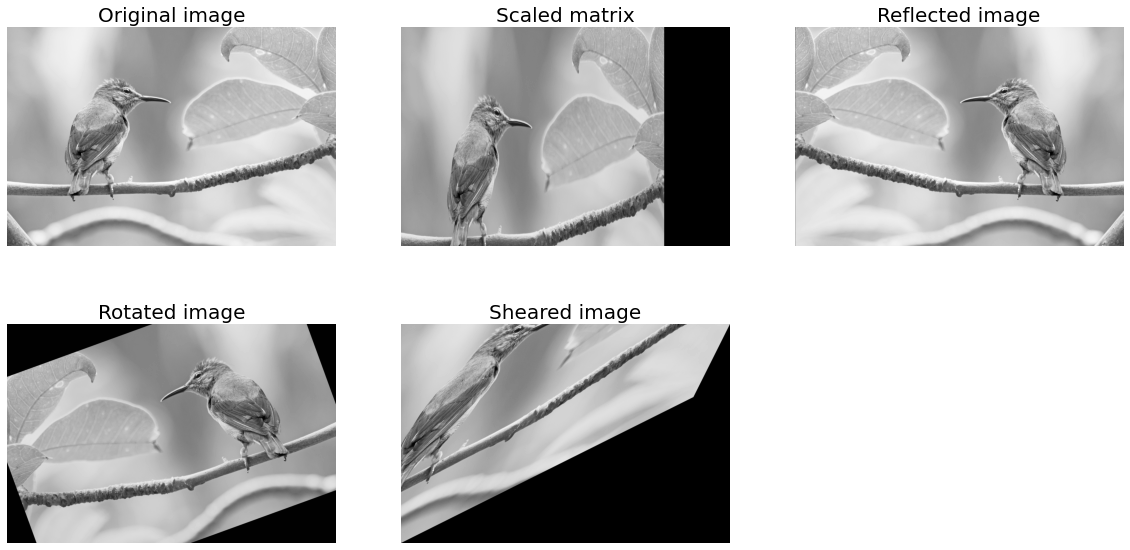

In [78]:
plt.figure(figsize=(20,10))

plt.subplot(231), plt.imshow(gray_humming_bird, cmap='gray'), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(232), plt.imshow(scaled_bird, cmap='gray'), plt.axis('off'), plt.title('Scaled matrix', size=20)
plt.subplot(233), plt.imshow(reflected_bird, cmap='gray'), plt.axis('off'), plt.title('Reflected image', size=20)

plt.subplot(234), plt.imshow(rotated_bird, cmap='gray'), plt.axis('off'), plt.title('Rotated image', size=20)
plt.subplot(235), plt.imshow(sheared_bird, cmap='gray'), plt.axis('off'), plt.title('Sheared image', size=20)

plt.show()